In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *

grad_data_to_load = "4YearGradRate .csv"
grad_data = pd.read_csv(grad_data_to_load)
grad_data_df = pd.DataFrame(grad_data).reset_index()

#To remove NaN
grad_data_df = grad_data_df.dropna(how ='any')
grad_data_df.head()

,index,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,SUBGROUP,2017 Adjusted Cohort Grad Rate,2016 Adjusted Cohort Grad Rate,2015 Adjusted Cohort Grad Rate,2014 Adjusted Cohort Grad Rate
0,0,1,ATLANTIC,110,ATLANTIC CITY,10,Atlantic City High School,S,80.54,76.14,73.71,70.32
2,2,1,ATLANTIC,120,ATLANTIC CO VOCATIONAL,10,Atlantic County Institute of Technology,S,98.74,99.04,98.08,97.48
4,4,1,ATLANTIC,590,BUENA REGIONAL,25,BUENA REGIONAL HIGH SCHOOL,S,86.98,91.71,90.56,87.98
6,6,1,ATLANTIC,1310,EGG HARBOR TWP,5,EGG HARBOR TOWNSHIP HIGH SCHOOL,S,94.18,92.27,93.85,93.09
8,8,1,ATLANTIC,1790,GREATER EGG HARBOR REG,40,Absegami High School,S,91.83,91.75,90.25,92.86


In [46]:
cleaned_graduation_data =grad_data_df[[
    "DISTRICT_NAME","SCHOOL_NAME","2014 Adjusted Cohort Grad Rate",
    "2015 Adjusted Cohort Grad Rate","2016 Adjusted Cohort Grad Rate","2017 Adjusted Cohort Grad Rate"
]]
#To transpose year column
cleaned_graduation_data = pd.melt(cleaned_graduation_data, id_vars=["DISTRICT_NAME","SCHOOL_NAME"], 
                  var_name="YEAR", value_name="GRAD_RATE")
#To select just the year part from the year column
cleaned_graduation_data["YEAR"] = cleaned_graduation_data["YEAR"].apply(lambda x: int(x[0:4]))

#To remove any record with grad rate = "-"
cleaned_graduation_data = cleaned_graduation_data.loc[cleaned_graduation_data["GRAD_RATE"]!='-'].copy()
# Change grad rate to float
cleaned_graduation_data["GRAD_RATE"] = cleaned_graduation_data["GRAD_RATE"].apply(lambda x: float(x))

#To get the first part of the district name
cleaned_graduation_data["DISTRICT_NAME"] = cleaned_graduation_data["DISTRICT_NAME"].apply(lambda x: x.split()[0])

#To create a key column(dist_year) to join population data 
cleaned_graduation_data['dist_year'] = cleaned_graduation_data[['DISTRICT_NAME', 'YEAR']].apply(lambda x: str(x[0]) + str(x[1]), axis=1)
# cleaned_graduation_data
final_data=cleaned_graduation_data[(cleaned_graduation_data["DISTRICT_NAME"].isin(["PRINCETON","SUMMIT","BRIDGETON","CLIFTON","HOBOKEN"] )) & (cleaned_graduation_data["YEAR"]==2016)] 
final_data =final_data.rename( columns={"DISTRICT_NAME": "CITY"})
final_data["CITY"]

892     BRIDGETON
946       HOBOKEN
974     PRINCETON
1082      CLIFTON
1152       SUMMIT
Name: CITY, dtype: object

In [106]:
# getting Poverty data
poverty_data_to_load = "PovertyLevelByCity2016.csv"
poverty_data = pd.read_csv(poverty_data_to_load)
poverty_data["CITY"]=poverty_data["CITY"].apply(lambda x: x.upper())
poverty_data

,Unnamed: 0,YEAR,CITY,FAMILIES,FAMILIES_KIDS_UNDER_18,FAMILEIS_KIDS_UNDER_5,MARRIED_COUPLE,MARRIED_COUPLE_KIDS_UNDER_18,MARRIED_COUPLE_KIDS_UNDER_5,SINGLE_MOTHER,SINGLE_MOTHER_KIDS_UNDER_18,SINGLE_MOTHER_KIDS_UNDER_5,PEOPLE,PEOPLE_UNDER_18,PEOPLE_UNDER_18_KIDS_UNDER_18,PEOPLE_UNDER_18_KIDS_UNDER_5
0,0,2016,PRINCETON,3.5,4.6,2.1,1.4,1.2,0.0,25.5,33.2,100.0,6.6,4.5,4.5,1.1
1,0,2016,SUMMIT,2.9,3.8,1.3,2.4,2.8,1.3,9.6,17.4,0.0,5.1,3.9,3.9,2.5
2,0,2016,CLIFTON,6.3,9.3,3.7,4.4,7.0,2.0,12.0,17.1,12.0,8.8,13.4,13.2,13.8
3,0,2016,HOBOKEN,6.8,11.1,4.3,1.3,0.0,0.0,29.0,46.6,46.0,10.5,12.9,12.6,5.5
4,0,2016,BRIDGETON,29.5,34.2,42.1,13.0,16.4,24.4,42.2,45.7,47.4,30.4,40.3,40.8,44.7


In [90]:
final_data

,CITY,SCHOOL_NAME,YEAR,GRAD_RATE,dist_year
892,BRIDGETON,Bridgeton High School,2016,78.78,BRIDGETON2016
946,HOBOKEN,Hoboken High School,2016,86.01,HOBOKEN2016
974,PRINCETON,Princeton High School,2016,94.85,PRINCETON2016
1082,CLIFTON,Clifton High School,2016,83.79,CLIFTON2016
1152,SUMMIT,Summit High School,2016,96.09,SUMMIT2016


In [91]:
# merging data to plot graduation and poverty line chart
grad_pov_data=pd.merge(poverty_data,final_data,how='left',on="CITY")
grad_pov_data

,Unnamed: 0,YEAR_x,CITY,FAMILIES,FAMILIES_KIDS_UNDER_18,FAMILEIS_KIDS_UNDER_5,MARRIED_COUPLE,MARRIED_COUPLE_KIDS_UNDER_18,MARRIED_COUPLE_KIDS_UNDER_5,SINGLE_MOTHER,SINGLE_MOTHER_KIDS_UNDER_18,SINGLE_MOTHER_KIDS_UNDER_5,PEOPLE,PEOPLE_UNDER_18,PEOPLE_UNDER_18_KIDS_UNDER_18,PEOPLE_UNDER_18_KIDS_UNDER_5,SCHOOL_NAME,YEAR_y,GRAD_RATE,dist_year
0,0,2016,PRINCETON,3.5,4.6,2.1,1.4,1.2,0.0,25.5,33.2,100.0,6.6,4.5,4.5,1.1,Princeton High School,2016,94.85,PRINCETON2016
1,0,2016,SUMMIT,2.9,3.8,1.3,2.4,2.8,1.3,9.6,17.4,0.0,5.1,3.9,3.9,2.5,Summit High School,2016,96.09,SUMMIT2016
2,0,2016,CLIFTON,6.3,9.3,3.7,4.4,7.0,2.0,12.0,17.1,12.0,8.8,13.4,13.2,13.8,Clifton High School,2016,83.79,CLIFTON2016
3,0,2016,HOBOKEN,6.8,11.1,4.3,1.3,0.0,0.0,29.0,46.6,46.0,10.5,12.9,12.6,5.5,Hoboken High School,2016,86.01,HOBOKEN2016
4,0,2016,BRIDGETON,29.5,34.2,42.1,13.0,16.4,24.4,42.2,45.7,47.4,30.4,40.3,40.8,44.7,Bridgeton High School,2016,78.78,BRIDGETON2016


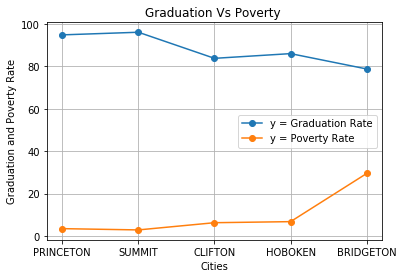

In [119]:

plt.plot(grad_pov_data["CITY"],grad_pov_data["GRAD_RATE"],marker="o")
plt.plot(grad_pov_data["CITY"],grad_pov_data["FAMILIES"],marker="o")
plt.legend(['y = Graduation Rate', 'y = Poverty Rate'], loc='best')
#fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
xlabel('Cities')
ylabel('Graduation and Poverty Rate')
title('Graduation Vs Poverty ')
grid(True)
show()